In [62]:
%load_ext autoreload
%autoreload 2

import RIS_gravity_inversion.inversion as inv 
import RIS_gravity_inversion.utils as utils

import numpy as np
import pandas as pd
# make beep sound when notify is called at end of long-running cells
from IPython.display import Audio
wave = np.sin(2*np.pi*400*np.arange(10000*1)/10000)
notify = Audio(wave, rate=10000, autoplay=True)

import os 
os.getcwd()
# %load_ext snakeviz

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'c:\\Users\\matthewt\\Documents\\Python_Scripts\\RIS_gravity_inversion'

# Functions

In [63]:
zoom = 350e3
n_shift = 0#150e3#600e3
w_shift = 0#-150e3#250e3
buffer = 50e3

# starting inversion region is 1,000km x 1,000km
e_inv = -580000+zoom+w_shift
w_inv = 420000-zoom+w_shift
n_inv = -1420000+zoom-n_shift
s_inv = -420000-zoom-n_shift

inv_reg = [e_inv, w_inv, n_inv, s_inv]
e_buff, w_buff, n_buff, s_buff = int(e_inv-buffer), int(w_inv+buffer), int(n_inv-buffer), int(s_inv+buffer)
buffer_reg = [e_buff, w_buff, n_buff, s_buff]
buffer_reg_str=f'{e_buff}/{w_buff}/{n_buff}/{s_buff}'
inv_reg_ll = "-180/180/-90/-71"

fig_height = 80
fig_width = fig_height*(w_inv-e_inv)/(s_inv-n_inv)

inv_ratio = (s_inv-n_inv)/(fig_height/1000)
buffer_ratio = (s_buff-n_buff)/(fig_height/1000)

inv_proj = f"x1:{inv_ratio}"
buffer_proj = f"x1:{buffer_ratio}"

inv_proj_ll = f"s0/-90/-71/1:{inv_ratio}"
buffer_proj_ll = f"s0/-90/-71/1:{buffer_ratio}"

layers_list = pd.Series([
             'ice',
             'water',
             'bathymetry',
            #  'basement',
            #  'moho'
])

spacing_list = pd.Series([
                40e3,
                40e3,
                40e3,
                # 20e3,
                # 20e3
])

rho_list = pd.Series([
            920, #890 to 917 from Muto et al. 2013
            1030, #from Muto et al. 2013
            2300,
            # 2670,
            # 3300
])

grav_spacing = 40e3

active_layer='bathymetry'

fname_list = pd.Series([
        # SURFACE 
            'inversion_layers/bedmachine/BedMachine_surface_filled.nc',
        # ICEBASE
            'inversion_layers/bedmachine/BedMachine_icebase_filled.nc',
        # BED/BATHYMETRY
            # 'bathymetry_data/bedmap_bedmachine_RIGGS_grd_fill.nc',
            # 'bathymetry_data/bedmap2_bed_regional.nc',
            'inversion_layers/bedmachine/BedMachine_bed.nc',
        # BASEMENT
            # 'inversion_layers/ANTASed_mag_basement_filled.nc',
            # 'inversion_layers/RE_basement_BedMachinebed_filled.nc',
            # 'inversion_layers/lindeque_basement.nc',
        # MOHO
            # 'inversion_layers/An_moho_filt.nc'
            # 'inversion_layers/Shen_moho.nc',
            # 'inversion_layers/Pappa_moho.nc'
])

# forward_layers = {k:v for k,v in layers.items() if k not in ['ice']}

# inv_reg_ll = inv.GMT_reg_xy_to_ll(inv_reg)
# buffer_reg_ll = inv.GMT_reg_xy_to_ll(buffer_reg)

#  Import layers

filtering and resampling ice from 1000m to 40000m
filtering and resampling water from 1000m to 40000m
filtering and resampling bathymetry from 1000m to 40000m
ice: 225 points, elevations: 2065m to 1m
water: 225 points, elevations: 1942m to -601m
bathymetry: 225 points, elevations: 1942m to -861m
gravity: 6220 points
gravity avg. elevation: 1000
bathymetry control points:10475932


,x,y,Gobs,z
count,6220.000000,6.220000e+03,6.220000e+03,6220.0
mean,-81669.614148,-9.211712e+05,2.924420e-16,1000.0
std,115534.361925,1.151788e+05,8.812029e+00,0.0
min,-277500.000000,-1.117500e+06,-2.401345e+01,1000.0
25%,-182500.000000,-1.017500e+06,-5.999205e+00,1000.0
50%,-82500.000000,-9.225000e+05,-9.262215e-02,1000.0
75%,17500.000000,-8.225000e+05,5.993481e+00,1000.0
max,117500.000000,-7.225000e+05,2.720973e+01,1000.0


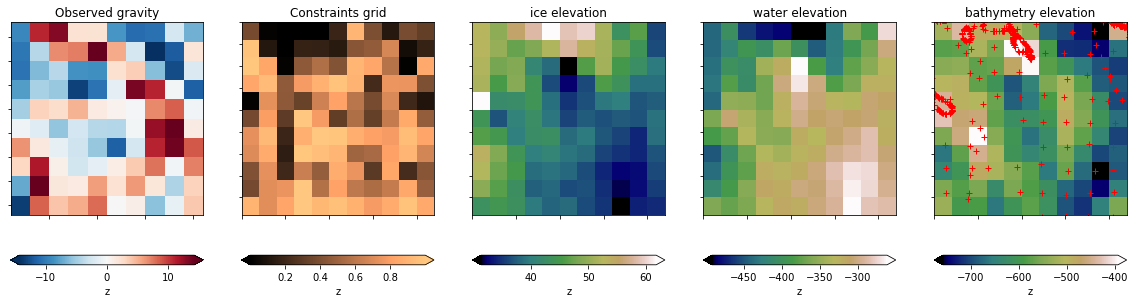

In [64]:
layers, df_grav, constraints_df, constraints_RIS_df = inv.import_layers(
    layers_list, 
    spacing_list, 
    rho_list, 
    fname_list,
    grav_spacing, 
    active_layer,
    buffer_reg,
    inv_reg,
    constraints=True,
    plot=True,
    plot_region=inv_reg
    )
df_grav.describe()

# Make prism layers

In [65]:
inv.grids_to_prism_layers(
    layers, 
    plot=False, 
    plot_type='3D', 
    plot_region=inv_reg,
    buffer_region = buffer_reg,
    inversion_region = inv_reg,
    ) 

bathymetry top: -501m and bottom: -861m
water top: -285m and bottom: -501m
ice top: 110m and bottom: -285m


# Forward gravity

finished ice layer
finished water layer
finished bathymetry layer


,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total
count,6220.000000,6.220000e+03,6.220000e+03,6220.0,6.220000e+03,6.220000e+03,6.220000e+03,6.220000e+03
mean,-81669.614148,-9.211712e+05,2.924420e-16,1000.0,-1.023547e-15,-5.117735e-16,4.386630e-16,-1.462210e-16
std,115534.361925,1.151788e+05,8.812029e+00,0.0,2.161384e+00,4.559069e+00,7.795564e+00,4.274942e+00
min,-277500.000000,-1.117500e+06,-2.401345e+01,1000.0,-5.193770e+00,-9.996667e+00,-2.430821e+01,-1.506029e+01
25%,-182500.000000,-1.017500e+06,-5.999205e+00,1000.0,-1.669572e+00,-3.415462e+00,-5.644284e+00,-2.372931e+00
50%,-82500.000000,-9.225000e+05,-9.262215e-02,1000.0,-6.249491e-01,-1.092282e-01,3.691284e-01,-2.981999e-01
75%,17500.000000,-8.225000e+05,5.993481e+00,1000.0,1.449666e+00,3.551533e+00,4.834476e+00,2.740185e+00
max,117500.000000,-7.225000e+05,2.720973e+01,1000.0,6.537338e+00,1.026297e+01,1.844736e+01,1.484366e+01


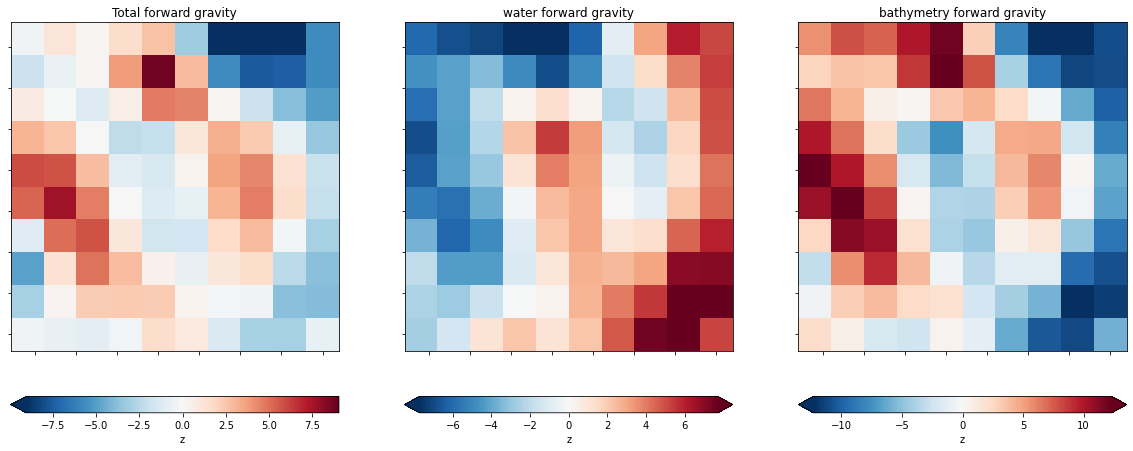

In [66]:
df_forward = inv.forward_grav_layers(layers, df_grav, ['ice'], inv_reg, grav_spacing, plot=True)
df_forward.describe()
# notify

# Anomalies

In [67]:
# regional_method='constraints'
# df_anomalies = inv.anomalies(layers, df_forward, 'Gobs', regional_method, grav_spacing, inversion_region=inv_reg,
#         corrections=['ice'], plot=True, plot_type='xarray', 
#         constraints_df=constraints_df, constraints_RIS_df=constraints_RIS_df)
# df_anomalies.describe()

,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total,grav_corrected,misfit,reg,res
count,6220.000000,6.220000e+03,6.220000e+03,6220.0,6.220000e+03,6.220000e+03,6.220000e+03,6.220000e+03,6.220000e+03,6.220000e+03,6220.000000,6220.000000
mean,-81669.614148,-9.211712e+05,2.924420e-16,1000.0,-1.023547e-15,-5.117735e-16,4.386630e-16,-1.462210e-16,1.462210e-15,1.315989e-15,0.068955,-0.068955
std,115534.361925,1.151788e+05,8.812029e+00,0.0,2.161384e+00,4.559069e+00,7.795564e+00,4.274942e+00,9.457811e+00,8.708460e+00,4.890672,5.977243
min,-277500.000000,-1.117500e+06,-2.401345e+01,1000.0,-5.193770e+00,-9.996667e+00,-2.430821e+01,-1.506029e+01,-2.602962e+01,-2.450637e+01,-13.285584,-27.253060
25%,-182500.000000,-1.017500e+06,-5.999205e+00,1000.0,-1.669572e+00,-3.415462e+00,-5.644284e+00,-2.372931e+00,-6.111507e+00,-6.538744e+00,-3.364535,-4.109769
50%,-82500.000000,-9.225000e+05,-9.262215e-02,1000.0,-6.249491e-01,-1.092282e-01,3.691284e-01,-2.981999e-01,3.484899e-01,5.013186e-01,-0.264110,-0.354420
75%,17500.000000,-8.225000e+05,5.993481e+00,1000.0,1.449666e+00,3.551533e+00,4.834476e+00,2.740185e+00,6.390222e+00,6.263199e+00,3.530974,3.955517
max,117500.000000,-7.225000e+05,2.720973e+01,1000.0,6.537338e+00,1.026297e+01,1.844736e+01,1.484366e+01,2.919557e+01,2.660146e+01,13.062788,20.407604


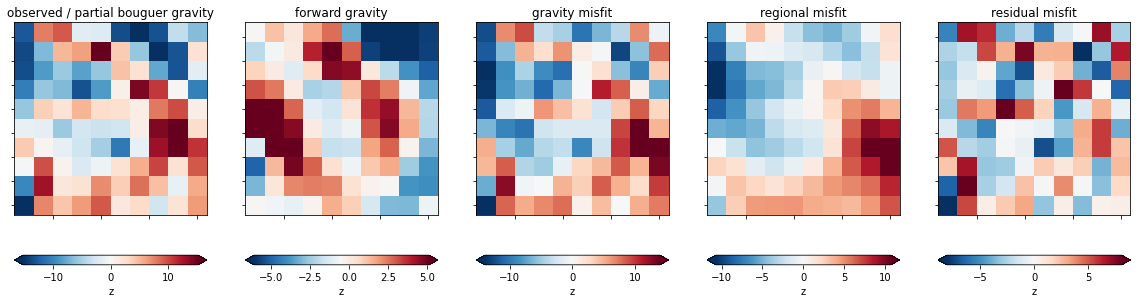

In [68]:
regional_method='filter'
filter='g200e3'
df_anomalies = inv.anomalies(layers, df_forward, 'Gobs', regional_method, grav_spacing, inversion_region=inv_reg,
        corrections=['ice'], filter=filter, plot=True, plot_type='xarray')
df_anomalies.describe()

,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total,grav_corrected,misfit,reg,res
count,6220.000000,6.220000e+03,6.220000e+03,6220.0,6.220000e+03,6.220000e+03,6.220000e+03,6.220000e+03,6.220000e+03,6.220000e+03,6220.000000,6220.000000
mean,-81669.614148,-9.211712e+05,2.924420e-16,1000.0,-1.023547e-15,-5.117735e-16,4.386630e-16,-1.462210e-16,1.462210e-15,1.315989e-15,-0.579334,0.579334
std,115534.361925,1.151788e+05,8.812029e+00,0.0,2.161384e+00,4.559069e+00,7.795564e+00,4.274942e+00,9.457811e+00,8.708460e+00,9.934564,8.386466
min,-277500.000000,-1.117500e+06,-2.401345e+01,1000.0,-5.193770e+00,-9.996667e+00,-2.430821e+01,-1.506029e+01,-2.602962e+01,-2.450637e+01,-106.182592,-53.640565
25%,-182500.000000,-1.017500e+06,-5.999205e+00,1000.0,-1.669572e+00,-3.415462e+00,-5.644284e+00,-2.372931e+00,-6.111507e+00,-6.538744e+00,-4.915853,-3.973177
50%,-82500.000000,-9.225000e+05,-9.262215e-02,1000.0,-6.249491e-01,-1.092282e-01,3.691284e-01,-2.981999e-01,3.484899e-01,5.013186e-01,-0.409588,-0.138130
75%,17500.000000,-8.225000e+05,5.993481e+00,1000.0,1.449666e+00,3.551533e+00,4.834476e+00,2.740185e+00,6.390222e+00,6.263199e+00,4.986859,4.151526
max,117500.000000,-7.225000e+05,2.720973e+01,1000.0,6.537338e+00,1.026297e+01,1.844736e+01,1.484366e+01,2.919557e+01,2.660146e+01,58.242853,90.997340


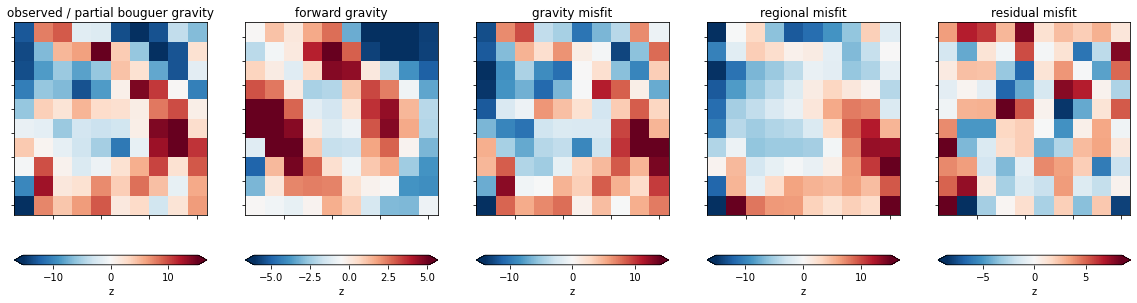

In [80]:
# regional_method='trend'
# trend_order=8
# df_anomalies = inv.anomalies(layers, df_forward, 'Gobs', regional_method, grav_spacing, inversion_region=inv_reg,
#         corrections=['ice'], trend_order=trend_order, plot=True, plot_type='xarray')
# df_anomalies.describe()

# Geo inversion

In [78]:
# %%snakeviz -t
regional_method='filter'
filter='g200e3'
trend_order=8
iter_corrections, df_inversion = inv.geo_inversion(
    active_layer='bathymetry',
    exclude_layers=['ice'],
    layers=layers, 
    input_grav=df_anomalies, 
    input_grav_column='Gobs',
    regional_method=regional_method, 
    grav_spacing = grav_spacing,
    inversion_region=inv_reg,
    buffer_region=buffer_reg,
    filter=filter, 
    trend_order=trend_order,
    deriv_type='annulus',
    # reset=True,
    constraints=False,
    Max_Iterations=3,
    max_layer_change_per_iter=100,
    misfit_sq_tolerance=0.00001,
    delta_misfit_squared_tolerance=0.002,
    ) 
# 15 mins 200km zoom/5k, 7mins 400kmzoom/5k (113x113 prisms, 33x33 grav) 
# 1:54s for annulus
# 1:46s for prisms
# full size, just ROSETTA, 5km res, Ice/Water/Bathy, annulus, 5its, 5th trend,: 18m 3s
# full size, just ROSETTA, 5km res, Ice/Water/Bathy, annulus, 5its, 400km filter,: 19m 35s
notify

##################################
iteration 1
initial RMS residual = 5.0mGal
finished jacobian
finished least squares
average layers correction 71.44m
constraints not applied
calculating updated forward gravity
updating the misfits
final RMS residual = 5.58mGal
##################################
iteration 2
initial RMS residual = 5.58mGal
finished jacobian
finished least squares
average layers correction 76.38m
constraints not applied
calculating updated forward gravity
updating the misfits
final RMS residual = 5.56mGal
##################################
iteration 3
initial RMS residual = 5.56mGal
finished jacobian
finished least squares
average layers correction 73.74m
constraints not applied
calculating updated forward gravity
updating the misfits
final RMS residual = 5.55mGal
Inversion terminated after 3 iterations with least-squares norm=30 because maximum number of iterations (3) reached


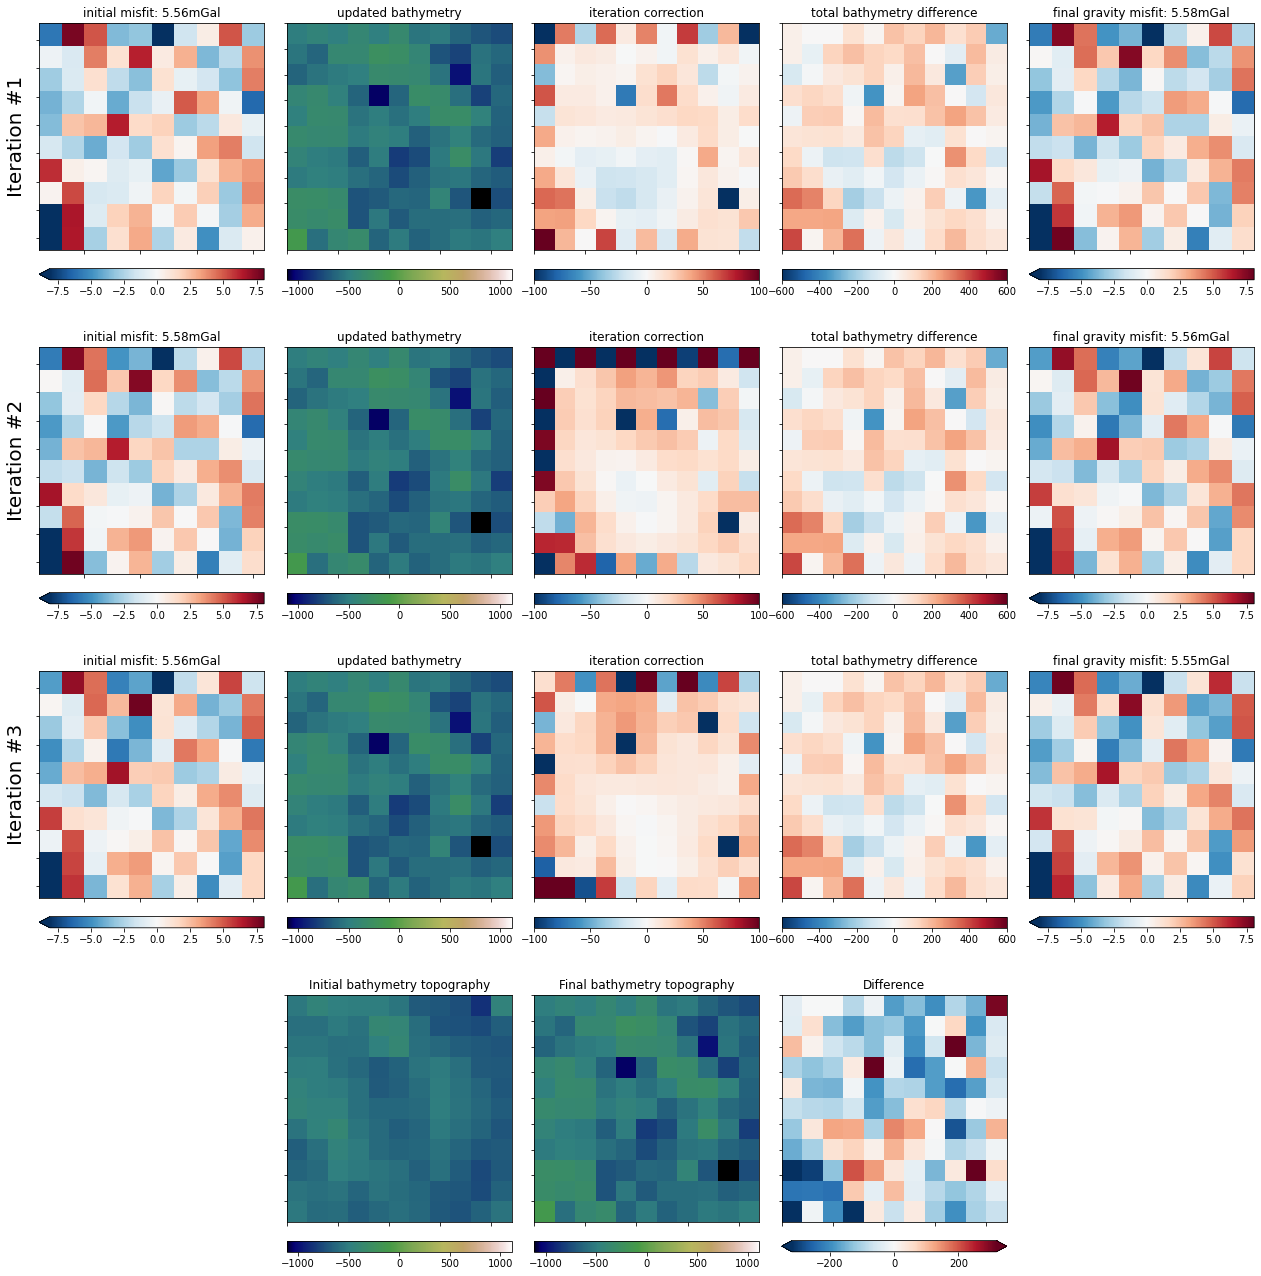

In [79]:
inv.plot_inversion_results(
    input_grav = df_anomalies,
    inversion_region = inv_reg,
    active_layer = 'bathymetry',
    grav_spacing = grav_spacing,
    epsg = 'epsg:3031',
    max_layer_change_per_iter = 100,
    constraints_RIS_df = constraints_RIS_df,
    constraints = False,
    layers = layers,
    iter_corrections = iter_corrections,
)

# Density inversion

In [ ]:
# density_inversion(density_layer='bathymetry', plot=True) #10mins, 200km zoom/5k, 3.5mins 400km zoom/5k (113x113 prisms, 33x33 grav)
# notify